In [1]:
import glob
import os
import sys
sys.path.append("..\\")

import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from src.data_handling import data_loading, data_visualize
from src.models.convnet_model import ConvnetModel

d:\Users\Kajetan\anaconda3\envs\inzok\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Kajetan\AppData\Roaming\Python\Python310\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


# Data loading

In [2]:
train_val_data = data_loading.load_data("..\\data\\train")
test_data = data_loading.load_data("..\\data\\val")

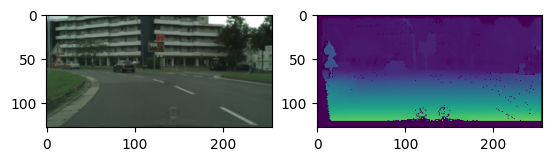

In [3]:
data_visualize.visualize_image_depth(train_val_data["img"][0], train_val_data["depth"][0])

## Training

In [4]:
model = ConvnetModel()

model.train(
    np.array(train_val_data["img"]),
    np.array(train_val_data["depth"]),
    n_epochs=15,
    lr=0.0001,
)

c:\Users\Kajetan\Documents\Programowanie\Magister\ROB\MonocularDepthEstimation\notebooks\..\src\models\convnet_model.py:288: FutureWarning: `nn.init.xavier_normal` is now deprecated in favor of `nn.init.xavier_normal_`.
  init.xavier_normal(m.weight)
c:\Users\Kajetan\Documents\Programowanie\Magister\ROB\MonocularDepthEstimation\notebooks\..\src\models\convnet_model.py:289: FutureWarning: `nn.init.constant` is now deprecated in favor of `nn.init.constant_`.
  init.constant(m.bias, 0)
100%|██████████| 149/149 [01:28<00:00,  1.67it/s]


Epoch [1/15] - Train Loss: 0.2853 - Val Loss: 0.2636


100%|██████████| 149/149 [01:28<00:00,  1.69it/s]


Epoch [2/15] - Train Loss: 0.2619 - Val Loss: 0.2579


100%|██████████| 149/149 [01:29<00:00,  1.67it/s]


Epoch [3/15] - Train Loss: 0.2561 - Val Loss: 0.2114


100%|██████████| 149/149 [01:31<00:00,  1.63it/s]


Epoch [4/15] - Train Loss: 0.2043 - Val Loss: 0.1966


100%|██████████| 149/149 [01:31<00:00,  1.62it/s]


Epoch [5/15] - Train Loss: 0.1990 - Val Loss: 0.1897


100%|██████████| 149/149 [01:32<00:00,  1.61it/s]


Epoch [6/15] - Train Loss: 0.1984 - Val Loss: 0.1997


100%|██████████| 149/149 [01:33<00:00,  1.59it/s]


Epoch [7/15] - Train Loss: 0.1796 - Val Loss: 0.1703


100%|██████████| 149/149 [01:33<00:00,  1.59it/s]


Epoch [8/15] - Train Loss: 0.1733 - Val Loss: 0.1703


100%|██████████| 149/149 [01:33<00:00,  1.59it/s]


Epoch [9/15] - Train Loss: 0.1723 - Val Loss: 0.1686


100%|██████████| 149/149 [01:33<00:00,  1.59it/s]


Epoch [10/15] - Train Loss: 0.1723 - Val Loss: 0.1692


100%|██████████| 149/149 [01:33<00:00,  1.59it/s]


2 iterations reached with no improvement to validation loss! stopping...


In [5]:
np.transpose(train_val_data["img"][0][np.newaxis], (0, 3, 1, 2))

array([[[[0.68627451, 0.67058824, 0.49411765, ..., 0.17254902,
          0.1254902 , 0.1372549 ],
         [0.68235294, 0.6627451 , 0.50196078, ..., 0.17647059,
          0.15294118, 0.15686275],
         [0.67843137, 0.65882353, 0.50980392, ..., 0.23921569,
          0.18823529, 0.14117647],
         ...,
         [0.33333333, 0.33333333, 0.33333333, ..., 0.21568627,
          0.21568627, 0.21568627],
         [0.32941176, 0.32941176, 0.32941176, ..., 0.21568627,
          0.21568627, 0.21176471],
         [0.32156863, 0.32156863, 0.3254902 , ..., 0.21568627,
          0.21568627, 0.21176471]],

        [[0.80784314, 0.79607843, 0.61568627, ..., 0.22352941,
          0.17647059, 0.19215686],
         [0.8       , 0.79215686, 0.62352941, ..., 0.23137255,
          0.20392157, 0.21960784],
         [0.8       , 0.78823529, 0.63529412, ..., 0.30588235,
          0.24313725, 0.19215686],
         ...,
         [0.40392157, 0.40392157, 0.40392157, ..., 0.28235294,
          0.27843137, 0.2

In [6]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

def preprocess_input(image_np):
    transform = A.Compose([
        ToTensorV2()
    ])
    augmented = transform(image=image_np)["image"]
    return augmented.unsqueeze(0)

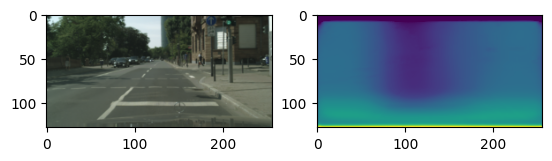

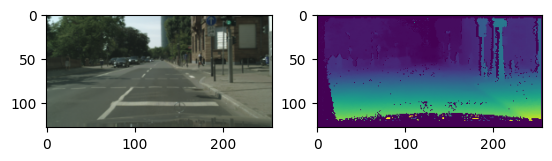

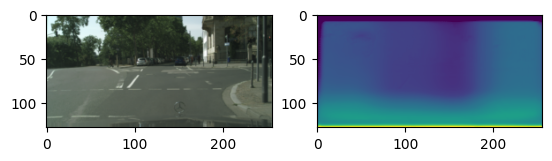

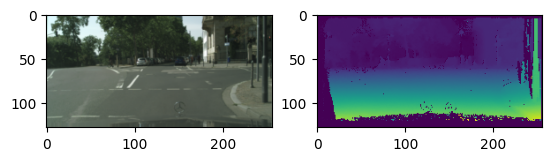

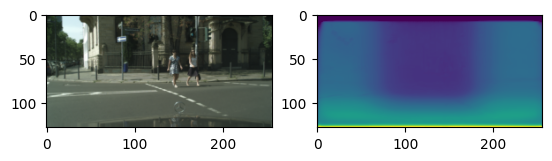

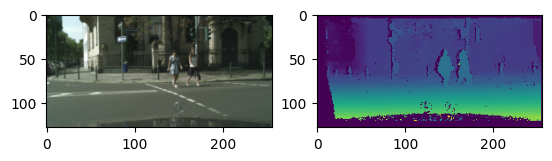

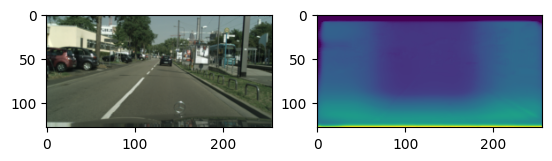

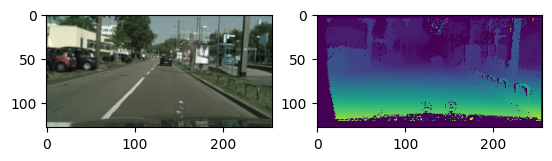

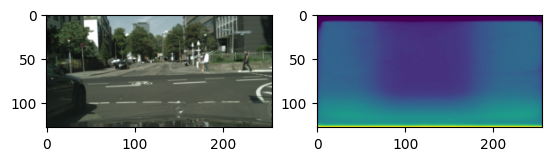

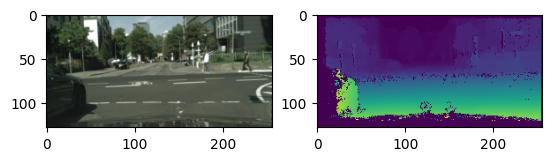

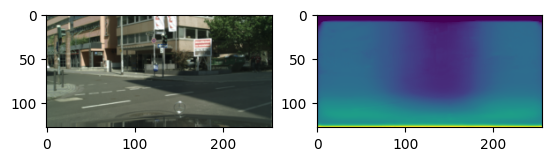

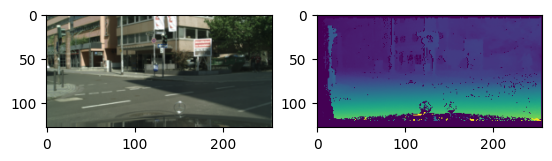

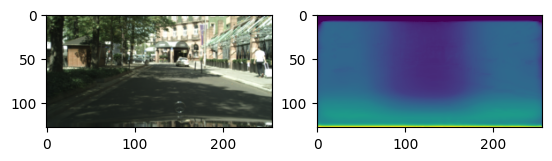

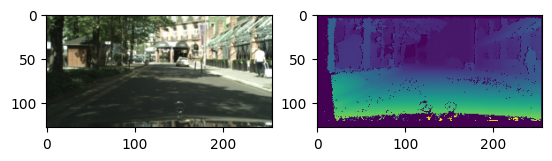

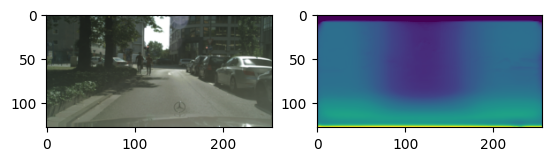

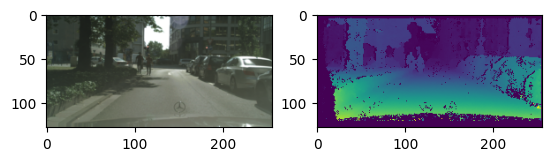

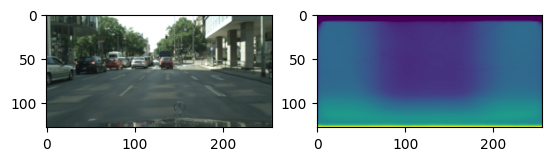

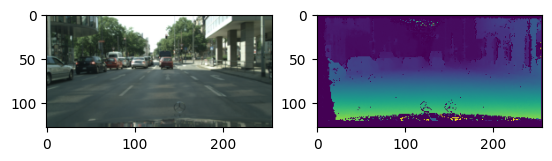

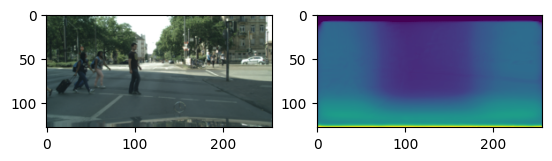

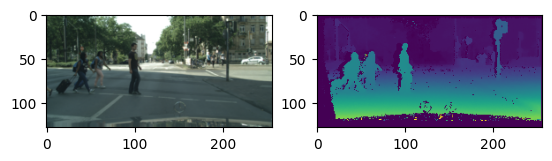

In [7]:
model._model.load_state_dict(torch.load("last_checkpoint.pth", weights_only=True))
model._model.eval()

for i in range(10, 20):
    x = preprocess_input(test_data["img"][i]).to('cuda').float()
    d = model._model(x).detach().cpu().numpy()[0]
    d = np.transpose(d, (1, 2, 0))

    data_visualize.visualize_image_depth(test_data["img"][i], d)
    data_visualize.visualize_image_depth(test_data["img"][i], test_data["depth"][i])

In [9]:
import torch
import torch.nn as nn
import torch.quantization
import torch.onnx
from torch.utils.data import DataLoader
from torchvision import transforms
from src.data_handling.data_loading import ImageDepthDataset
from src.models.convnet_model import shared_transforms, input_only_transforms
from torch.ao.quantization import QConfig, default_observer, default_weight_observer


def prepare_model_for_quantization():
    model = ConvnetModel()._model
    model.load_state_dict(torch.load("last_checkpoint.pth"))
    model.eval()

    model.fuse_model()
    return model

def get_calibration_loader():
    indices = np.arange(len(train_val_data["img"]))
    np.random.shuffle(indices)
    indices = indices[:64]
    dataset = ImageDepthDataset(
        np.array(train_val_data["img"])[indices],
        np.array(train_val_data["depth"])[indices],
        shared_transform=shared_transforms,
        input_only_transform=input_only_transforms,
    )
    return DataLoader(dataset, batch_size=32)

def quantize_model(model, data_loader):
    model.qconfig = QConfig(activation=default_observer, weight=default_weight_observer)
    
    torch.quantization.prepare(model, inplace=True)

    print("Calibrating...")
    with torch.no_grad():
        for inputs, _ in data_loader:
            model(inputs.float())

    torch.quantization.convert(model, inplace=True)
    return model


def export_to_onnx(model, output_path="quantized_model.onnx"):
    model.eval()
    model.to(torch.device('cpu')) 
    dummy_input = torch.randn(1, 3, 224, 224)
    torch.onnx.export(
        model,
        dummy_input,
        output_path,
        input_names=["input"],
        output_names=["output"],
        opset_version=15,
        dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},
    )

model = prepare_model_for_quantization()
calib_loader = get_calibration_loader()
quantized_model = quantize_model(model, calib_loader)
torch.save(quantized_model.state_dict(), "quantized_model.pth")
export_to_onnx(quantized_model)

Calibrating...


In [12]:
test_data["img"][0]

array([[[0.43137255, 0.4745098 , 0.3254902 ],
        [0.45098039, 0.48627451, 0.36470588],
        [0.45490196, 0.49019608, 0.38823529],
        ...,
        [0.52156863, 0.57254902, 0.42352941],
        [0.54117647, 0.60784314, 0.47843137],
        [0.55294118, 0.6       , 0.49411765]],

       [[0.38823529, 0.43529412, 0.2627451 ],
        [0.43921569, 0.4745098 , 0.34901961],
        [0.45490196, 0.48627451, 0.38431373],
        ...,
        [0.50980392, 0.55686275, 0.4       ],
        [0.52156863, 0.57647059, 0.43921569],
        [0.52156863, 0.56470588, 0.45098039]],

       [[0.40784314, 0.44705882, 0.27058824],
        [0.44313725, 0.47843137, 0.35294118],
        [0.45882353, 0.48627451, 0.38431373],
        ...,
        [0.49803922, 0.5372549 , 0.37254902],
        [0.49803922, 0.54117647, 0.38823529],
        [0.49019608, 0.52156863, 0.39607843]],

       ...,

       [[0.34117647, 0.40784314, 0.37254902],
        [0.34901961, 0.41176471, 0.37254902],
        [0.3372549 , 0

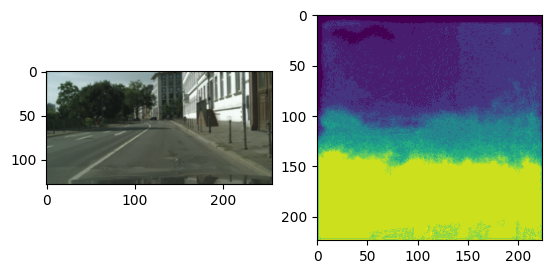

In [17]:
import onnxruntime as ort
from PIL import Image
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

session = ort.InferenceSession("quantized_model.onnx", providers=['CPUExecutionProvider'])
inp = test_data["img"][6]

def preprocess_image(image_array):
    image_array = (image_array * 255).astype(np.uint8)

    # Convert to PIL Image
    image = Image.fromarray(image_array)

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),  
    ])
    tensor = transform(image).unsqueeze(0) 
    return tensor.numpy().astype(np.float32)

input_tensor = preprocess_image(inp)
inputs = {session.get_inputs()[0].name: input_tensor}
outputs = session.run(None, inputs)

d = np.transpose(outputs[0][0], (1, 2, 0))
data_visualize.visualize_image_depth(inp, d)